In [2]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c
import aa_gun
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [3]:
#массовый тест моделей

_____ random 0
episode: 0   score: 0.375   memory length: 0   epsilon: 1
episode: 1   score: 0.4375   memory length: 0   epsilon: 1
episode: 2   score: 0.4375   memory length: 0   epsilon: 1
hit
episode: 3   score: 2.0625   memory length: 0   epsilon: 1
episode: 4   score: 0.5625   memory length: 0   epsilon: 1
episode: 5   score: 0.4375   memory length: 0   epsilon: 1
episode: 6   score: 1.5625   memory length: 0   epsilon: 1
hit
episode: 7   score: 1.8125   memory length: 0   epsilon: 1
episode: 8   score: 0.3125   memory length: 0   epsilon: 1
episode: 9   score: 0.375   memory length: 0   epsilon: 1
hit
episode: 10   score: 1.3125   memory length: 0   epsilon: 1
episode: 11   score: 0.5625   memory length: 0   epsilon: 1
hit
episode: 12   score: 1.625   memory length: 0   epsilon: 1
hit
episode: 13   score: 1.75   memory length: 0   epsilon: 1
hit
hit
hit
hit
episode: 14   score: 4.6875   memory length: 0   epsilon: 1
hit
hit
episode: 15   score: 3.1875   memory length: 0   epsilon

episode: 135   score: 1.125   memory length: 0   epsilon: 1
episode: 136   score: 0.1875   memory length: 0   epsilon: 1
episode: 137   score: 0.3125   memory length: 0   epsilon: 1
episode: 138   score: 0.875   memory length: 0   epsilon: 1
hit
episode: 139   score: 1.1875   memory length: 0   epsilon: 1


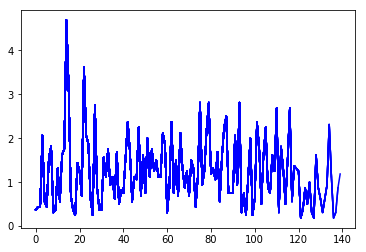

_____ random 1
hit
episode: 0   score: 1.8125   memory length: 0   epsilon: 1
episode: 1   score: 0.75   memory length: 0   epsilon: 1
episode: 2   score: 0.875   memory length: 0   epsilon: 1
episode: 3   score: 0.625   memory length: 0   epsilon: 1
episode: 4   score: 0.625   memory length: 0   epsilon: 1
hit
episode: 5   score: 1.8125   memory length: 0   epsilon: 1
episode: 6   score: 0.75   memory length: 0   epsilon: 1
episode: 7   score: 0.125   memory length: 0   epsilon: 1
hit
episode: 8   score: 2.4375   memory length: 0   epsilon: 1
hit
episode: 9   score: 2.375   memory length: 0   epsilon: 1
episode: 10   score: 0.625   memory length: 0   epsilon: 1
episode: 11   score: 0.75   memory length: 0   epsilon: 1
episode: 12   score: 0.3125   memory length: 0   epsilon: 1
episode: 13   score: 1.0   memory length: 0   epsilon: 1
episode: 14   score: 0.8125   memory length: 0   epsilon: 1
episode: 15   score: 0.8125   memory length: 0   epsilon: 1
episode: 16   score: 1.0625   memo

episode: 135   score: 0.625   memory length: 0   epsilon: 1
episode: 136   score: 0.75   memory length: 0   epsilon: 1
episode: 137   score: 1.3125   memory length: 0   epsilon: 1
episode: 138   score: 0.8125   memory length: 0   epsilon: 1
episode: 139   score: 0.75   memory length: 0   epsilon: 1


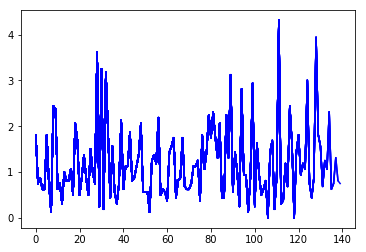

_____ random 2
episode: 0   score: 0   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.9375   memory length: 0   epsilon: 1
episode: 2   score: 0.6875   memory length: 0   epsilon: 1
episode: 3   score: 1.4375   memory length: 0   epsilon: 1
episode: 4   score: 1.375   memory length: 0   epsilon: 1
hit
episode: 5   score: 2.375   memory length: 0   epsilon: 1
episode: 6   score: 1.25   memory length: 0   epsilon: 1
episode: 7   score: 0.75   memory length: 0   epsilon: 1
episode: 8   score: 0.625   memory length: 0   epsilon: 1
episode: 9   score: 0.75   memory length: 0   epsilon: 1
episode: 10   score: 0.6875   memory length: 0   epsilon: 1
hit
episode: 11   score: 1.375   memory length: 0   epsilon: 1
episode: 12   score: 0.5625   memory length: 0   epsilon: 1
hit
episode: 13   score: 1.3125   memory length: 0   epsilon: 1
episode: 14   score: 0.3125   memory length: 0   epsilon: 1
episode: 15   score: 1.125   memory length: 0   epsilon: 1
hit
episode: 16   score: 1.8125   m

hit
episode: 134   score: 1.375   memory length: 0   epsilon: 1
episode: 135   score: 0.375   memory length: 0   epsilon: 1
episode: 136   score: 0.3125   memory length: 0   epsilon: 1
episode: 137   score: 0.8125   memory length: 0   epsilon: 1
hit
hit
episode: 138   score: 2.875   memory length: 0   epsilon: 1
episode: 139   score: 1.1875   memory length: 0   epsilon: 1


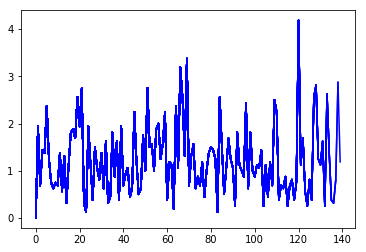

_____ random 3
hit
episode: 0   score: 1.1875   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.3125   memory length: 0   epsilon: 1
episode: 2   score: 0.9375   memory length: 0   epsilon: 1
episode: 3   score: 0.5625   memory length: 0   epsilon: 1
episode: 4   score: 1.625   memory length: 0   epsilon: 1
episode: 5   score: 0.6875   memory length: 0   epsilon: 1
episode: 6   score: 0.75   memory length: 0   epsilon: 1
hit
episode: 7   score: 1.625   memory length: 0   epsilon: 1
episode: 8   score: 0.625   memory length: 0   epsilon: 1
episode: 9   score: 0.8125   memory length: 0   epsilon: 1
episode: 10   score: 1.0   memory length: 0   epsilon: 1
hit
episode: 11   score: 1.0625   memory length: 0   epsilon: 1
hit
hit
episode: 12   score: 3.125   memory length: 0   epsilon: 1
hit
hit
episode: 13   score: 2.6875   memory length: 0   epsilon: 1
hit
hit
episode: 14   score: 2.25   memory length: 0   epsilon: 1
episode: 15   score: 0.375   memory length: 0   epsilon: 1
episode

episode: 136   score: 0.4375   memory length: 0   epsilon: 1
hit
hit
episode: 137   score: 2.5625   memory length: 0   epsilon: 1
hit
episode: 138   score: 2.0   memory length: 0   epsilon: 1
hit
episode: 139   score: 1.3125   memory length: 0   epsilon: 1


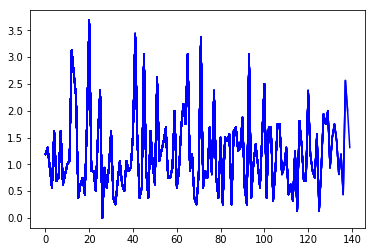

_____ random 4
hit
episode: 0   score: 1.8125   memory length: 0   epsilon: 1
hit
episode: 1   score: 1.75   memory length: 0   epsilon: 1
hit
episode: 2   score: 1.5   memory length: 0   epsilon: 1
hit
episode: 3   score: 2.625   memory length: 0   epsilon: 1
episode: 4   score: 0.6875   memory length: 0   epsilon: 1
episode: 5   score: 0.375   memory length: 0   epsilon: 1
episode: 6   score: 0.9375   memory length: 0   epsilon: 1
episode: 7   score: 0.875   memory length: 0   epsilon: 1
episode: 8   score: 0.875   memory length: 0   epsilon: 1
hit
hit
episode: 9   score: 2.125   memory length: 0   epsilon: 1
episode: 10   score: 0.375   memory length: 0   epsilon: 1
hit
episode: 11   score: 2.5   memory length: 0   epsilon: 1
episode: 12   score: 0.75   memory length: 0   epsilon: 1
hit
episode: 13   score: 1.375   memory length: 0   epsilon: 1
hit
episode: 14   score: 1.8125   memory length: 0   epsilon: 1
episode: 15   score: 0.75   memory length: 0   epsilon: 1
episode: 16   scor

hit
episode: 136   score: 1.5   memory length: 0   epsilon: 1
hit
episode: 137   score: 1.5   memory length: 0   epsilon: 1
episode: 138   score: 0.3125   memory length: 0   epsilon: 1
episode: 139   score: 0.3125   memory length: 0   epsilon: 1


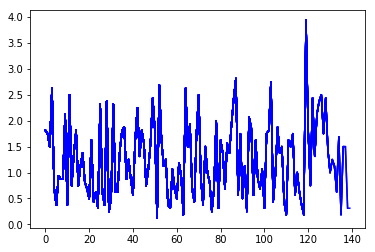

_____ a2c 0



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the 

episode: 100   score: 0   memory length: 0   epsilon: 0
episode: 101   score: 0   memory length: 0   epsilon: 0
episode: 102   score: 0   memory length: 0   epsilon: 0
episode: 103   score: 0   memory length: 0   epsilon: 0
episode: 104   score: 0   memory length: 0   epsilon: 0
episode: 105   score: 0   memory length: 0   epsilon: 0
episode: 106   score: 0   memory length: 0   epsilon: 0
episode: 107   score: 0   memory length: 0   epsilon: 0
episode: 108   score: 0   memory length: 0   epsilon: 0
episode: 109   score: 0   memory length: 0   epsilon: 0
episode: 110   score: 0   memory length: 0   epsilon: 0
episode: 111   score: 0   memory length: 0   epsilon: 0
episode: 112   score: 0   memory length: 0   epsilon: 0
episode: 113   score: 0   memory length: 0   epsilon: 0
episode: 114   score: 0   memory length: 0   epsilon: 0
episode: 115   score: 0   memory length: 0   epsilon: 0
episode: 116   score: 0   memory length: 0   epsilon: 0
episode: 117   score: 0   memory length: 0   eps

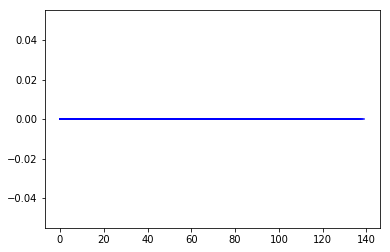

_____ a2c 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 0   memory length: 0   epsilon: 0
episode: 1   s

episode: 127   score: 0   memory length: 0   epsilon: 0
episode: 128   score: 0   memory length: 0   epsilon: 0
episode: 129   score: 0   memory length: 0   epsilon: 0
episode: 130   score: 0   memory length: 0   epsilon: 0
episode: 131   score: 0   memory length: 0   epsilon: 0
episode: 132   score: 0   memory length: 0   epsilon: 0
episode: 133   score: 0   memory length: 0   epsilon: 0
episode: 134   score: 0   memory length: 0   epsilon: 0
episode: 135   score: 0   memory length: 0   epsilon: 0
episode: 136   score: 0   memory length: 0   epsilon: 0
episode: 137   score: 0   memory length: 0   epsilon: 0
episode: 138   score: 0   memory length: 0   epsilon: 0
episode: 139   score: 0   memory length: 0   epsilon: 0


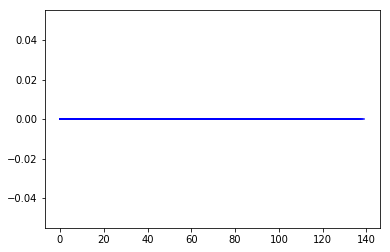

_____ a2c 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 0   memory length: 0   epsilon: 0
episode: 1   s

episode: 127   score: 0   memory length: 0   epsilon: 0
episode: 128   score: 0   memory length: 0   epsilon: 0
episode: 129   score: 0   memory length: 0   epsilon: 0
episode: 130   score: 0   memory length: 0   epsilon: 0
episode: 131   score: 0   memory length: 0   epsilon: 0
episode: 132   score: 0   memory length: 0   epsilon: 0
episode: 133   score: 0   memory length: 0   epsilon: 0
episode: 134   score: 0   memory length: 0   epsilon: 0
episode: 135   score: 0   memory length: 0   epsilon: 0
episode: 136   score: 0   memory length: 0   epsilon: 0
episode: 137   score: 0   memory length: 0   epsilon: 0
episode: 138   score: 0   memory length: 0   epsilon: 0
episode: 139   score: 0   memory length: 0   epsilon: 0


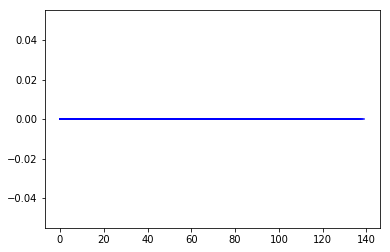

_____ a2c 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 0.0625   memory length: 0   epsilon: 0
episode: 

episode: 120   score: 0   memory length: 0   epsilon: 0
episode: 121   score: 0   memory length: 0   epsilon: 0
episode: 122   score: 0   memory length: 0   epsilon: 0
episode: 123   score: 0   memory length: 0   epsilon: 0
episode: 124   score: 0.125   memory length: 0   epsilon: 0
episode: 125   score: 0   memory length: 0   epsilon: 0
episode: 126   score: 0.625   memory length: 0   epsilon: 0
episode: 127   score: 0   memory length: 0   epsilon: 0
hit
episode: 128   score: 1.4375   memory length: 0   epsilon: 0
episode: 129   score: 0   memory length: 0   epsilon: 0
episode: 130   score: 0.125   memory length: 0   epsilon: 0
episode: 131   score: 0.1875   memory length: 0   epsilon: 0
episode: 132   score: 0   memory length: 0   epsilon: 0
episode: 133   score: 0   memory length: 0   epsilon: 0
episode: 134   score: 0   memory length: 0   epsilon: 0
episode: 135   score: 0   memory length: 0   epsilon: 0
episode: 136   score: 0   memory length: 0   epsilon: 0
episode: 137   score: 

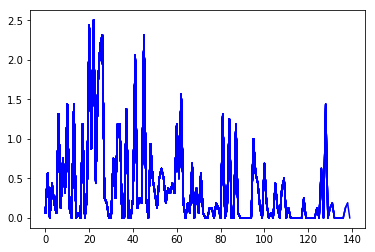

_____ a2c 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 175       
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: 0.125   memory length: 0   epsilon: 0
episode: 1

episode: 127   score: 0   memory length: 0   epsilon: 0
episode: 128   score: 0   memory length: 0   epsilon: 0
episode: 129   score: 0   memory length: 0   epsilon: 0
episode: 130   score: 0   memory length: 0   epsilon: 0
episode: 131   score: 0   memory length: 0   epsilon: 0
episode: 132   score: 0   memory length: 0   epsilon: 0
episode: 133   score: 0   memory length: 0   epsilon: 0
episode: 134   score: 0   memory length: 0   epsilon: 0
episode: 135   score: 0   memory length: 0   epsilon: 0
episode: 136   score: 0   memory length: 0   epsilon: 0
episode: 137   score: 0   memory length: 0   epsilon: 0
episode: 138   score: 0   memory length: 0   epsilon: 0
episode: 139   score: 0   memory length: 0   epsilon: 0


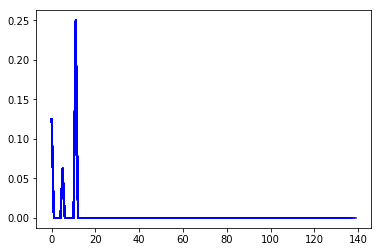

_____ ddqn 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_22 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_25 (Dense)             (None, 24)                600       
_____________________________________________________________

hit
episode: 85   score: 1.1875   memory length: 2000   epsilon: 0.009998671593271896
episode: 86   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 87   score: 0.4375   memory length: 2000   epsilon: 0.009998671593271896
episode: 88   score: 0.9375   memory length: 2000   epsilon: 0.009998671593271896
episode: 89   score: 0.9375   memory length: 2000   epsilon: 0.009998671593271896
episode: 90   score: 0.6875   memory length: 2000   epsilon: 0.009998671593271896
episode: 91   score: 0.375   memory length: 2000   epsilon: 0.009998671593271896
episode: 92   score: 0.25   memory length: 2000   epsilon: 0.009998671593271896
episode: 93   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 94   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 95   score: 0.25   memory length: 2000   epsilon: 0.009998671593271896
episode: 96   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 97   score: 0.25   memory le

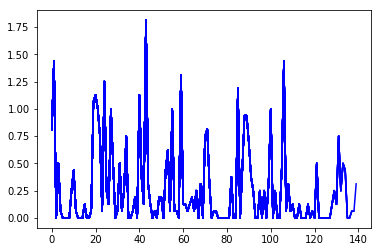

_____ ddqn 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_28 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_31 (Dense)             (None, 24)                600       
_____________________________________________________________

episode: 83   score: 0   memory length: 2000   epsilon: 0.009998671593271896
episode: 84   score: 0.4375   memory length: 2000   epsilon: 0.009998671593271896
episode: 85   score: 0.125   memory length: 2000   epsilon: 0.009998671593271896
episode: 86   score: 0.9375   memory length: 2000   epsilon: 0.009998671593271896
episode: 87   score: 0.3125   memory length: 2000   epsilon: 0.009998671593271896
episode: 88   score: 0.375   memory length: 2000   epsilon: 0.009998671593271896
episode: 89   score: 0.3125   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 90   score: 1.25   memory length: 2000   epsilon: 0.009998671593271896
episode: 91   score: 0.5625   memory length: 2000   epsilon: 0.009998671593271896
hit
hit
episode: 92   score: 3.0625   memory length: 2000   epsilon: 0.009998671593271896
hit
episode: 93   score: 1.1875   memory length: 2000   epsilon: 0.009998671593271896
episode: 94   score: 0.25   memory length: 2000   epsilon: 0.009998671593271896
episode: 95

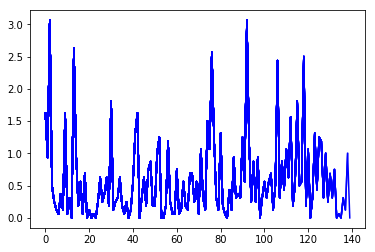

_____ ddqn 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_34 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 175       
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_37 (Dense)             (None, 24)                600       
_____________________________________________________________

KeyboardInterrupt: 

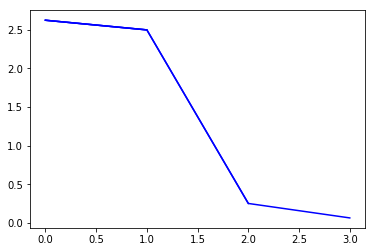

In [4]:
#Проверь на зенитке, на cartpole и на mountain car

score_dict_full={'random':[],'ddqn':[],'a2c':[],'sarsa':[]}
border_med = 100
EPISODES=140
score_dict_med={'random':[],'ddqn':[],'a2c':[],'sarsa':[]}#c border_med по... такты. Надо, чтобы проверить быстроту обучения

agent_list=[random_agent.randomAgent,a2c.A2CAgent,ddqn.DoubleDQNAgent,sarsa.SarsaAgent]
for ag_num in range(4):
    if ag_num==0:
        name='random'
    if ag_num==1:
        name='a2c'
    if ag_num==2:
        name='ddqn' 
    if ag_num==3:
        name='sarsa'
    
    for estimation in range(5):
        print('_____',name,estimation)
        #здесь весь код от инициализации модели до выдачи scores. Но без рендера.
        # In case of CartPole-v1, maximum length of episode is 500
        
        env = aa_gun.AA_gun_simple0_env(fast_planes=True,long_projectiles=True,random_speed=True)
        #env = gym.make('MountainCar-v0')
        
        #env=CartPoleEnv9()
        # get size of state and action from environment
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n

        #agent = DoubleDQNAgent(state_size, action_size)
        agent = agent_list[ag_num](state_size, action_size)
        agent.train_start=100
        agent.render=True

        scores, episodes = [], []
        reward_lst = []
        s_list=[]
        a_list=[]

        for e in range(EPISODES):
            done = False
            score = 0
            state = env.reset()
            state = np.reshape(state, [1, state_size])

            while not done:
                #if (e in range(2,7)) or (e in range(20,25)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
                #    if agent.render:
                #        env.render()

                # get action for the current state and go one step in environment
                action = agent.get_action(state)
                next_state, reward, done, info = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                # if an action make the episode end, then gives penalty of -100

                
                # save the sample <s, a, r, s'> to the replay memory
                agent.append_sample(state, action, reward, next_state, done)
                #if next_state[0,11]!=reward:
                #    print('state[13]!=reward',state[0,11],reward)
                #
                s_list.append(state)
                a_list.append(action)
                reward_lst.append(reward)
                #

                # every time step do the training
                agent.train_model()
                score += reward
                state = next_state

                if done:
                    # every episode update the target model to be same with model
                    agent.update_target_model()

                    # every episode, plot the play time
                    scores.append(score)
                    episodes.append(e)
                    pylab.plot(episodes, scores, 'b')
                    #pylab.savefig("./save_graph/aa_gun_dqn.png")
                    print("episode:", e, "  score:", score, "  memory length:",
                          len(agent.memory), "  epsilon:", agent.epsilon)



            # save the model
            #if e % 50 == 0:
            #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")



        #и первые 3000 тактов - это рандом
        #Ходов так 50
        score_dict_full[name].append(np.mean(scores))
        score_dict_med[name].append(np.mean(scores[border_med:]))
        import pickle
        f=open('score_dict.pkl','wb')
        pickle.dump([score_dict_full,score_dict_med],f)
        plt.show()

In [5]:
score_dict_full

{'a2c': [0.0, 0.0, 0.0, 0.38660714285714287, 0.003125],
 'ddqn': [0.26607142857142857, 0.5919642857142857],
 'random': [1.2348214285714285,
  1.191517857142857,
  1.2299107142857142,
  1.2133928571428572,
  1.2495535714285715],
 'sarsa': []}